   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       1     4.0   964982703  
1       5     4.0   847434962  
2       7     4.5  1106635946  
3      15     2.5  1510577970  
4      17     4.5  1305696483  
   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventu

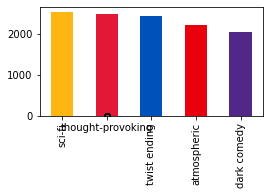

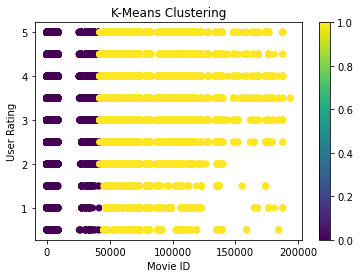

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
movies = pd.read_csv("C:\\Users\Brian\Desktop\EECS_731\Project3\Data\movies.csv")
ratings = pd.read_csv("C:\\Users\Brian\Desktop\EECS_731\Project3\Data\\ratings.csv")
tags = pd.read_csv("C:\\Users\Brian\Desktop\EECS_731\Project3\Data\\tags.csv")


temp1 = pd.merge(movies, ratings, on=["movieId"], how="inner")
print(temp1.head())
temp2 = pd.merge(temp1, tags, on=["movieId"], how="inner")
print(temp2.head())

del temp2["timestamp_y"]
del temp2["timestamp_x"]
del temp2["userId_x"]
del temp2["userId_y"]

print(temp2.head())

def numWords(data, col, lists):
    keyword_count = dict()
    for i in lists: keyword_count[i] = 0
    for lists_keywords in data[col].str.split('|'):
        if type(lists_keywords) == float and pd.isnull(lists_keywords): continue
        for j in lists_keywords: 
            if pd.notnull(j): keyword_count[j] += 1
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

labels = set()
for s in temp2['genres'].str.split('|').values:
    labels = labels.union(set(s))

numberOfWords = numWords(temp2, 'genres', labels)
print(numberOfWords)

temp2.boxplot(column='rating', figsize=(10,5), return_type='both')
totalTags = temp2['tag'].value_counts()
print("\n", totalTags.head(10))

colors = ["#ffb612", "#e31837", "#0051ba", "#e8000d", "#512888", "#c0c0c0", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
totalTags[:5].plot(kind='bar', figsize=(4,2),color=colors)

average_ratings= temp2.groupby('movieId', as_index=False).mean()
del average_ratings['movieId']
print("\n", average_ratings.head(10))

movies_by_rating = temp2[['movieId','rating']].groupby('movieId').count()
print("\n", movies_by_rating.head())



engine = KNeighborsClassifier(n_neighbors=20)

# Training data points
data_points = average_ratings[['rating']].values

#Training labels
labels = average_ratings.index.values

print("\nData points(average ratings for the movies):\n", data_points)
print("\nLabels:\n ", labels)

engine.fit(data_points, labels)
pred = engine.predict(average_ratings)
print("\nPredictions based on KNeighbors Classifier: ", pred)

features = temp2[['movieId','rating']]
def doKmeans(X, n_cluster = 8):
    model = KMeans(n_cluster)
    model.fit(X)
    cluster_labels = model.predict(X)
    center = model.cluster_centers_
    return (cluster_labels, center)

cluster_labels,center = doKmeans(features, 2)
kmeans = pd.DataFrame(cluster_labels)
features.insert((features.shape[1]),'kmeans', kmeans)

import itertools

fig = plt.figure()
ax = fig.add_subplot(111)

colors = itertools.cycle(["r", "b", "g"])

scatter = ax.scatter(temp2['movieId'],features['rating'],
                     c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Movie ID')
ax.set_ylabel('User Rating')
   
plt.colorbar(scatter)